<a href="https://colab.research.google.com/github/Jagadishchandra17/League-of-Legends-Match-Predictor-using-pytorch/blob/main/League_of_Legends_Match_Predictor_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **League of Legends Match Predictor using Pytorch**


League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios.

we would be building a logistic regression model aimed at predicting the outcomes of League of Legends matches. and we would be using  the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the analysis.

## Data Loading and Preprocessing

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.

we first load the League of Legends dataset into a pandas DataFrame using pd.read_csv(). Subsequently, we delineate the features (X) and the target variable (y), where 'win' serves as our target, and the remaining columns constitute the features. To ensure robust model training and evaluation, we partition the data into training and testing sets using train_test_split(), allocating 20% of the data for testing and employing a random_state of 42 for consistent results. Given the varying scales of our features, we standardize them using StandardScaler() to facilitate optimal model performance. Finally, we transform the scaled features and target variable into PyTorch tensors using torch.tensor(), preparing them for subsequent model training and evaluation.

In [ ]:
## Write your code here
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("league_of_legends_data_large.csv")

# Split data into features and target
X = data.drop("win", axis=1)
y = data["win"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


 let's construct our logistic regression model using PyTorch. We begin by defining a class, LogisticRegressionModel, which inherits from torch.nn.Module. Within this class, we initialize a linear layer in the __init__() method, effectively setting up the core of our logistic regression. The forward() method then applies the sigmoid activation function to the output of this linear layer, ensuring our predictions are within the probability range of 0 to 1. To prepare for training, we determine the input dimension, input_dim, directly from the shape of our training features, X_train.shape[1]. We then instantiate our model, passing this input_dim. For optimization, we select Binary Cross-Entropy Loss (BCELoss()) as our loss function, suitable for binary classification tasks, and Stochastic Gradient Descent (optim.SGD()) with a learning rate of 0.01 as our optimizer, enabling efficient model parameter updates.

In [ ]:
## Write your code here

import torch.nn as nn
import torch.optim as optim

# Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Set input dimension
input_dim = X_train_tensor.shape[1]

# Initialize the model
model = LogisticRegressionModel(input_dim)

# Define the loss function
criterion = nn.BCELoss()

# Initialize the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)





we will execute the training regimen for our logistic regression model across 1000 epochs, aiming to optimize its predictive accuracy. Each epoch will commence with the model transitioning to training mode, ensuring the activation of gradient computation for parameter updates. Subsequently, the optimizer's gradients will be reset, and the training dataset will be propagated through the model to generate predictions. The discrepancy between predicted and actual outcomes, quantified by the Binary Cross-Entropy Loss, will inform the backpropagation process, enabling the computation of gradients for parameter adjustment. The optimizer will then utilize these gradients to update the model's weights, iteratively minimizing the loss function. To monitor the training progress, the loss will be logged at intervals of 100 epochs. Upon completion of the training phase, the model will be transitioned to evaluation mode, disabling gradient computation. Predictions will be generated for both the training and test datasets. Finally, the model's accuracy on both datasets will be computed, employing a classification threshold of 0.5, and the results will be presented to assess the model's performance and generalization capabilities.

In [ ]:
# Write your code here
# Set number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Model evaluation
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    # Predictions
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

    # Apply threshold of 0.5
    train_predicted = (train_preds > 0.5).float()
    test_predicted = (test_preds > 0.5).float()

    # Calculate accuracy
    train_accuracy = (train_predicted == y_train_tensor).float().mean()
    test_accuracy = (test_predicted == y_test_tensor).float().mean()

    print(f"Training Accuracy: {train_accuracy.item() * 100:.2f}%")
    print(f"Testing Accuracy: {test_accuracy.item() * 100:.2f}%")




Epoch [100/1000], Loss: 0.7201
Epoch [200/1000], Loss: 0.7069
Epoch [300/1000], Loss: 0.6986
Epoch [400/1000], Loss: 0.6934
Epoch [500/1000], Loss: 0.6903
Epoch [600/1000], Loss: 0.6883
Epoch [700/1000], Loss: 0.6872
Epoch [800/1000], Loss: 0.6864
Epoch [900/1000], Loss: 0.6860
Epoch [1000/1000], Loss: 0.6857
Training Accuracy: 54.00%
Testing Accuracy: 52.00%


In an effort to enhance the model's generalization capabilities and mitigate overfitting, we will incorporate L2 regularization, also known as Ridge Regression, into our training procedure. This optimization technique penalizes large weight values, promoting simpler and more robust model solutions. Specifically, we will modify the optimizer to include the weight_decay parameter, effectively applying L2 regularization during the training process. For instance, we will instantiate the optimizer using optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), where weight_decay=0.01 specifies the regularization strength. Subsequently, we will retrain the model for 1000 epochs, utilizing this modified optimizer with L2 regularization. Upon completion of training, we will rigorously evaluate the model's performance on both the training and test datasets. Accuracy will be computed by comparing the model's predicted outcomes to the actual labels (y_train and y_test), employing a classification threshold of 0.5 to determine win or loss. Finally, we will present the training and test accuracies, providing a comprehensive assessment of the model's performance and the impact of L2 regularization.

In [ ]:
# Reinitialize the model
model = LogisticRegressionModel(input_dim)

# Define the loss function
criterion = nn.BCELoss()

# Initialize the optimizer with L2 regularization (weight decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Number of epochs
num_epochs = 1000

# Training loop with L2 regularization
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model after training
model.eval()
with torch.no_grad():
    # Predictions
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

    # Apply threshold of 0.5
    train_predicted = (train_preds > 0.5).float()
    test_predicted = (test_preds > 0.5).float()

    # Accuracy calculation
    train_accuracy = (train_predicted == y_train_tensor).float().mean()
    test_accuracy = (test_predicted == y_test_tensor).float().mean()

    print(f"Training Accuracy with L2 Regularization: {train_accuracy.item() * 100:.2f}%")
    print(f"Testing Accuracy with L2 Regularization: {test_accuracy.item() * 100:.2f}%")


Epoch [100/1000], Loss: 0.7345
Epoch [200/1000], Loss: 0.7135
Epoch [300/1000], Loss: 0.7014
Epoch [400/1000], Loss: 0.6945
Epoch [500/1000], Loss: 0.6905
Epoch [600/1000], Loss: 0.6883
Epoch [700/1000], Loss: 0.6870
Epoch [800/1000], Loss: 0.6863
Epoch [900/1000], Loss: 0.6859
Epoch [1000/1000], Loss: 0.6856
Training Accuracy with L2 Regularization: 54.87%
Testing Accuracy with L2 Regularization: 51.50%


## Visualization

 we will utilize visualization tools such as confusion matrices and ROC curves, which provide insights into classification accuracy and the trade-off between sensitivity and specificity. Additionally, we will calculate the AUC to quantify the overall quality of the binary classification, and generate a classification report to summarize various performance metrics. These tools will enable us to thoroughly assess the model's effectiveness and identify areas for potential improvement.

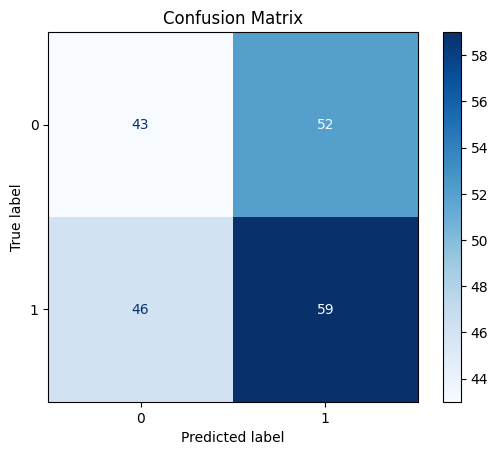

In [ ]:
## Write your code here

import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc
)

# Reinitialize model with L2 regularization
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate model
model.eval()
with torch.no_grad():
    y_train_probs = model(X_train_tensor)
    y_test_probs = model(X_test_tensor)

    y_train_pred = (y_train_probs > 0.5).float()
    y_test_pred = (y_test_probs > 0.5).float()

# Convert tensors to NumPy arrays for sklearn metrics
y_test_np = y_test_tensor.numpy()
y_test_pred_np = y_test_pred.numpy()
y_test_probs_np = y_test_probs.numpy()

# Confusion Matrix
cm = confusion_matrix(y_test_np, y_test_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()




In [ ]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test_np, y_test_pred_np))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.48      0.45      0.47        95
         1.0       0.53      0.56      0.55       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



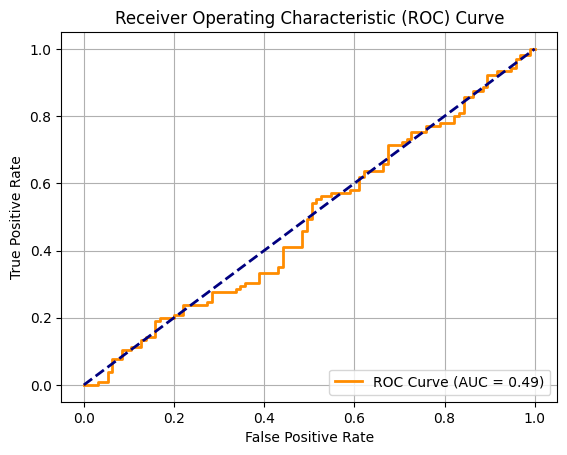

In [ ]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_np, y_test_probs_np)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

we will save its learned parameters, specifically the state_dict, using torch.save(). This approach is preferred due to its flexibility and efficiency compared to saving the entire model object. Subsequently, to demonstrate the model's persistence, we will instantiate a new model object and load the saved parameters using torch.load() and model.load_state_dict(). Finally, we will rigorously evaluate the loaded model on the test dataset, ensuring it maintains its performance integrity. This evaluation will be conducted in evaluation mode (model.eval()) with gradient computation disabled (torch.no_grad()), confirming the successful preservation and restoration of the model's predictive capabilities.

In [ ]:
torch.save(model.state_dict(), 'lol_logistic_model.pth')
# Create a new instance of the model
loaded_model = LogisticRegressionModel(input_dim)
# Load the model
loaded_model.load_state_dict(torch.load('lol_logistic_model.pth'))

# Set the model to evaluation mode
loaded_model.eval()

# Evaluate the loaded model on test data
with torch.no_grad():
    y_test_probs_loaded = loaded_model(X_test_tensor)
    y_test_pred_loaded = (y_test_probs_loaded > 0.5).float()

# Convert predictions to numpy for evaluation
y_test_pred_loaded_np = y_test_pred_loaded.numpy()
y_test_true_np = y_test_tensor.numpy()

# Evaluate Accuracy
from sklearn.metrics import accuracy_score

loaded_model_accuracy = accuracy_score(y_test_true_np, y_test_pred_loaded_np)
print(f"Accuracy of the loaded model on test set: {loaded_model_accuracy:.4f}")


Accuracy of the loaded model on test set: 0.5100


## Hyperparameter Tuning

we will conduct hyperparameter tuning focusing on the learning rate, a critical factor in the training process. We will evaluate a range of learning rates, specifically [0.01, 0.05, 0.1], to identify the optimal value that maximizes test accuracy. For each learning rate, we will reinitialize the model and optimizer, ensuring a clean slate for each training iteration, as the optimizer's parameters are inherently linked to the learning rate. Subsequently, we will train the model for a fixed number of epochs, 50 or 100, for each learning rate and record the corresponding test accuracy. Upon completion of training for all specified learning rates, we will compare the resulting test accuracies and report the learning rate that yields the highest performance, thereby fine-tuning our model for enhanced predictive capabilities.

In [ ]:
#Learning_rates to test
learning_rates = [0.01, 0.05, 0.1]

# Store results for each learning rate
test_accuracies = []

# Loop through each learning rate
for lr in learning_rates:
    # Reinitialize the model
    model = LogisticRegressionModel(input_dim)

    # Reinitialize the optimizer with the current learning rate
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)

    # Train the model for a fixed number of epochs
    for epoch in range(100):  # You can change this to 50 if preferred
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        y_train_probs = model(X_train_tensor)
        y_train_pred = (y_train_probs > 0.5).float()

        # Compute the loss
        # The target tensor should have the same shape as the output of the model
        loss = criterion(y_train_probs, y_train_tensor) # Remove squeeze() from y_train_probs

        # Backpropagation
        loss.backward()

        # Update weights
        optimizer.step()

    # Evaluate on test data
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_test_probs = model(X_test_tensor)
        y_test_pred = (y_test_probs > 0.5).float()

    # Convert predictions to numpy for accuracy calculation
    y_test_pred_np = y_test_pred.numpy()
    y_test_true_np = y_test_tensor.numpy()

    # Compute accuracy
    from sklearn.metrics import accuracy_score
    test_accuracy = accuracy_score(y_test_true_np, y_test_pred_np)

    # Append the test accuracy for this learning rate
    test_accuracies.append(test_accuracy)
    print(f"Test accuracy for learning rate {lr}: {test_accuracy:.4f}")

# Find the best learning rate based on test accuracy
best_lr = learning_rates[test_accuracies.index(max(test_accuracies))]
print(f"\nBest learning rate: {best_lr}")

Test accuracy for learning rate 0.01: 0.4800
Test accuracy for learning rate 0.05: 0.5300
Test accuracy for learning rate 0.1: 0.5250

Best learning rate: 0.05


## Feature Importance

        Feature  Importance
0         kills    0.138901
3   gold_earned    0.130658
5  wards_placed    0.101084
7  damage_dealt   -0.034408
4            cs   -0.016522
6  wards_killed   -0.004247
2       assists    0.004096
1        deaths    0.002224


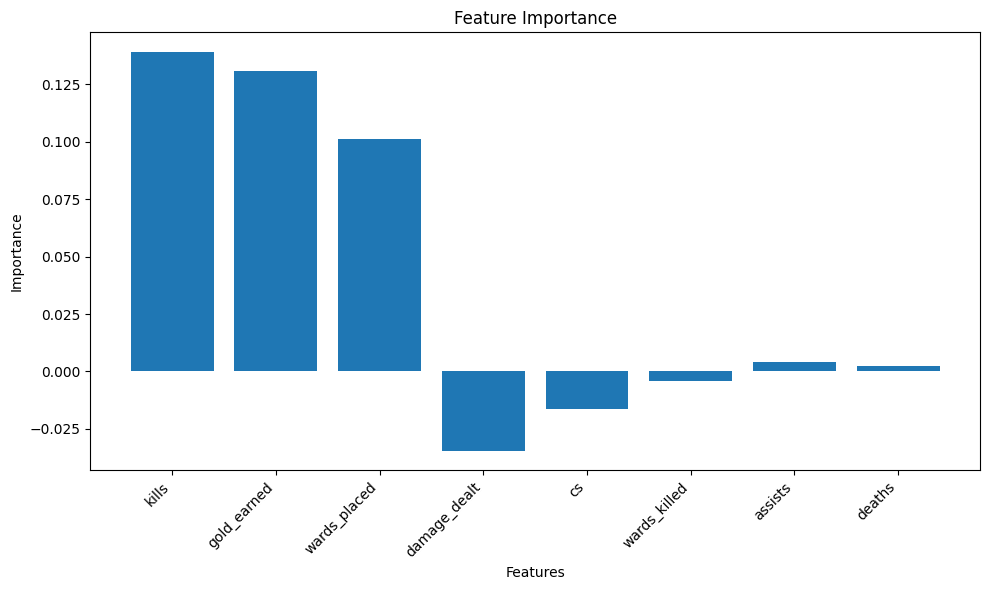

In [ ]:
# Evaluate Feature Importance
# 1. Extracting Model Weights
weights = model.linear.weight.data.numpy().flatten()

# 2. Creating a DataFrame
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})

# 3. Sorting and Plotting Feature Importance
feature_importance = feature_importance.sort_values(by='Importance', key=abs, ascending=False) #sort by absolute value.

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right') #rotate x ticks and align right
plt.tight_layout() #avoid overlapping labels
plt.show()

